In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
trade = pd.read_csv("cashewprep.csv")#Initial Data
trade['Quantity'] = trade['Quantity']/1000 #Convert "Quantity" from KG to MT
exports = trade.loc[trade['Flow'] == 'Export'] #Separate Exports
exports = exports.loc[exports['Country or Area'] != 'India']#Exclude India
exports = exports.loc[exports['Country or Area'] != 'Viet Nam']#Exclude Viet Nam
exports = exports.loc[exports['Country or Area'] != 'Brazil']#Exclude Brazil
exp_by_year = exports.groupby(exports['Year'])['Quantity'].sum()#Group by year and sum exports
#print(exports)
'''
Where as with exports we needed to exclude the three exporters of kernel\n
with imports, we need to isolate Brazil, India and Viet Nam.
'''
imports = trade.loc[trade['Flow'] == 'Import'] #Separate Imports
ind = imports.loc[imports['Country or Area'] == 'India'] #India
viet = imports.loc[imports['Country or Area'] == 'Viet Nam']#Viet Nam
brz = imports.loc[imports['Country or Area'] == 'Brazil']#Brazil
importers = [brz, ind, viet] #List of data by country
world_imp = pd.concat(importers) #Merge the three countries to 1 DF
imp_by_year = world_imp.groupby(world_imp['Year'])['Quantity'].sum()#Group by year sum imports
#print(imports)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


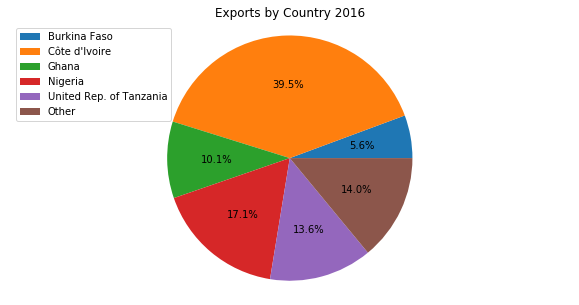

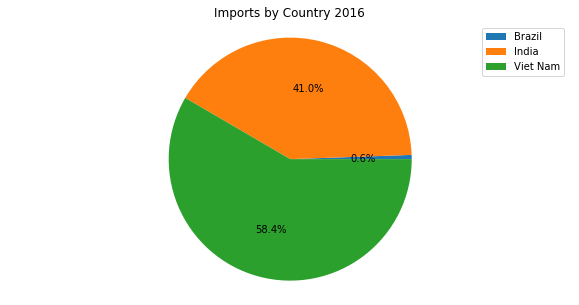

Looks like Cote DIvoire is the top exporter for 2016
Has is it always been that way?


In [49]:
#See who the major players are
recent = exports.loc[exports['Year'] == 2016]#Snapshot 2016
recenti = imports.loc[imports['Year'] == 2016]
#Generate a DataFrame for a pie chart
pie1 = pd.DataFrame()
pie1['labels'] = recent['Country or Area']
pie1['quantity'] = recent['Quantity']
pie1['pctofw'] = recent['Quantity']/sum(recent['Quantity'])
#print(pie1) # Too many entries for a clean pie chart
#Separate those who export at least 5% of world exports
pie2 = pie1.loc[pie1['pctofw'] >= .05] #the others
pie3 = pie1.loc[pie1['pctofw'] <= .05]
#add a new entry for "Other" to the original DF.
pie2.loc['6'] = ['Other', sum(pie3['quantity']), sum(pie3['pctofw'])]

#Generate pie chart for the exporters
labelex = pie2['labels']
plt.figure(figsize=(10, 5))
plt.pie(pie2.quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Exports by Country 2016')
plt.legend(labelex)
plt.show()

#For the Importers
labeli = recenti['Country or Area']
plt.figure(figsize=(10, 5))
plt.pie(recenti.Quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Imports by Country 2016')
plt.legend(labeli)
plt.show()


print("Looks like Cote DIvoire is the top exporter for 2016")
print('Has is it always been that way?')


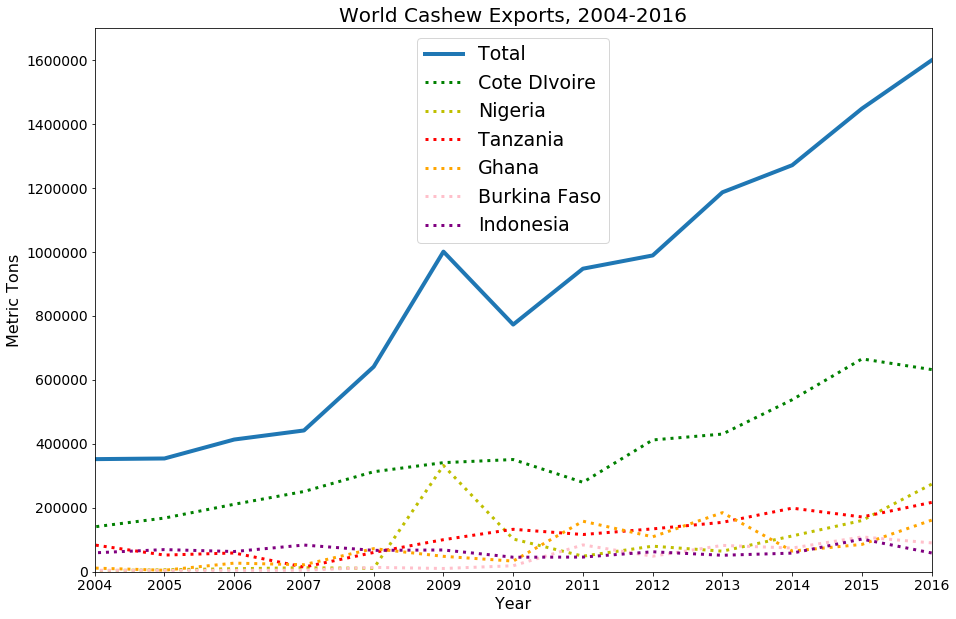

In [97]:
'''
Charting Countries vs World Production. From the information we got earlier\n
we know we should isolate , Cote Divoire, Tanzania, Nigeria, Burkina Faso\n
and Ghana. I am going to include Indonesia as well. India, Brazil and Viet Nam 
'''
#Exporters
#Isolate the countries
ivc = exports.loc[exports['Country or Area'] == "Côte d'Ivoire"]
ngr = exports.loc[exports['Country or Area'] == 'Nigeria']
tzn = exports.loc[exports['Country or Area'] == 'United Rep. of Tanzania']
gha = exports.loc[exports['Country or Area'] == 'Ghana']
bkf = exports.loc[exports['Country or Area'] == 'Burkina Faso']
indo = exports.loc[exports['Country or Area'] == 'Indonesia']
expcount = [ivc, ngr, tzn, gha, bkf, indo]
plt.figure(figsize=(15,10))
plt.plot(exp_by_year, label='Total', linewidth=4)
plt.plot(ivc['Year'], ivc['Quantity'], label='Cote DIvoire', color='g', linestyle='dotted', linewidth=3)
plt.plot(ngr['Year'], ngr['Quantity'], label='Nigeria', color='y', linestyle='dotted', linewidth=3)
plt.plot(tzn['Year'], tzn['Quantity'], label='Tanzania', color='r', linestyle='dotted', linewidth=3)
plt.plot(gha['Year'], gha['Quantity'], label='Ghana', color='orange', linestyle='dotted', linewidth=3)
plt.plot(bkf['Year'], bkf['Quantity'], label='Burkina Faso', color='pink', linestyle='dotted', linewidth=3)
plt.plot(indo['Year'], indo['Quantity'], label='Indonesia', color='purple', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 1700000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,1700000)
#plt.xlim(1998,2016) is the whole range
plt.xlim(2004,2016)
plt.title('World Cashew Exports, 2004-2016', fontsize=20)

plt.show()



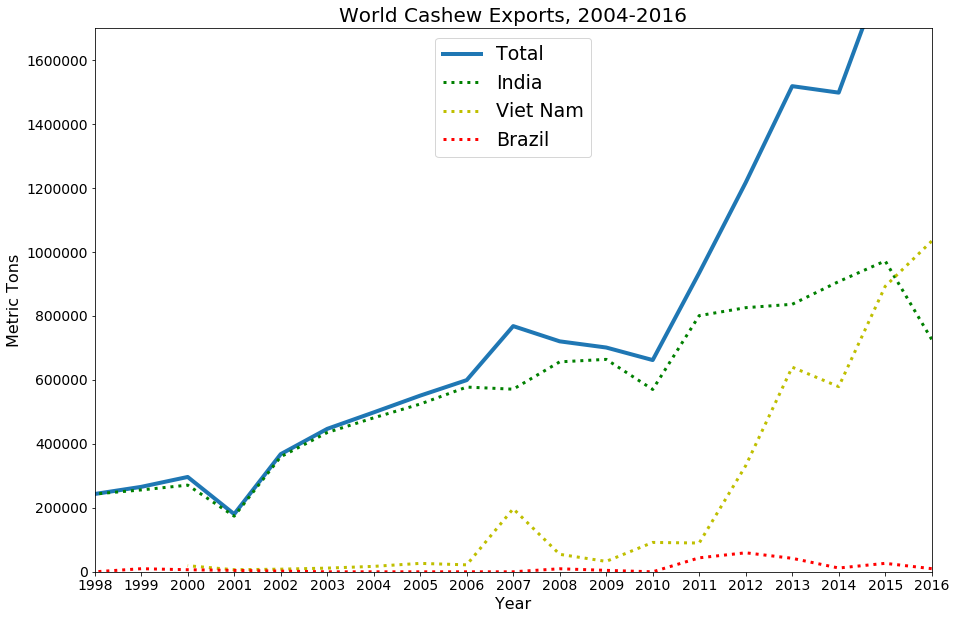

In [99]:
#For the importers
plt.figure(figsize=(15,10))
plt.plot(imp_by_year, label='Total', linewidth=4)
plt.plot(ind['Year'], ind['Quantity'], label='India', color='g', linestyle='dotted', linewidth=3)
plt.plot(viet['Year'], viet['Quantity'], label='Viet Nam', color='y', linestyle='dotted', linewidth=3)
plt.plot(brz['Year'], brz['Quantity'], label='Brazil', color='r', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 1700000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,1700000)
#plt.xlim(1998,2016) is the whole range
plt.xlim(1998,2016)
plt.title('World Cashew Exports, 2004-2016', fontsize=20)

plt.show()